# Лабораторна робота 3
Пшеничного Ніколи, ДО-3

In [13]:
library(psych)
library(ggplot2)
library(moments)
library(gamlss)
library(goftest)
library(goft)
library(qqplotr)
library(car)
library(corrplot)
library(ggstatsplot)
library(qgraph)
library(modelr)
library(lmtest)

In [2]:
data <- read.csv("/Users/nicol/OneDrive/Документы/Я у мамы программист/R/index.csv", header = TRUE)

View(data)

Year,Month,Day,Federal.Funds.Target.Rate,Federal.Funds.Upper.Target,Federal.Funds.Lower.Target,Effective.Federal.Funds.Rate,Real.GDP..Percent.Change.,Unemployment.Rate,Inflation.Rate
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1954,7,1,NA,NA,NA,0.80,4.6,5.8,NA
1954,8,1,NA,NA,NA,1.22,NA,6.0,NA
1954,9,1,NA,NA,NA,1.06,NA,6.1,NA
1954,10,1,NA,NA,NA,0.85,8.0,5.7,NA
1954,11,1,NA,NA,NA,0.83,NA,5.3,NA
1954,12,1,NA,NA,NA,1.28,NA,5.0,NA
1955,1,1,NA,NA,NA,1.39,11.9,4.9,NA
1955,2,1,NA,NA,NA,1.29,NA,4.7,NA
1955,3,1,NA,NA,NA,1.35,NA,4.6,NA


In [3]:
UI <- data[, c("Effective.Federal.Funds.Rate", "Inflation.Rate")]
UI <- na.omit(UI)
colnames(UI) <- c("EFFR", "Inflation")
UI

,EFFR,Inflation
,<dbl>,<dbl>
43,2.72,3.2
44,1.67,3.2
45,1.20,2.8
46,1.26,2.4
47,0.63,2.4
48,0.93,2.1
49,0.68,2.4
50,1.53,2.1
51,1.76,1.7


## Діаграма розсіювання. Зображення данних

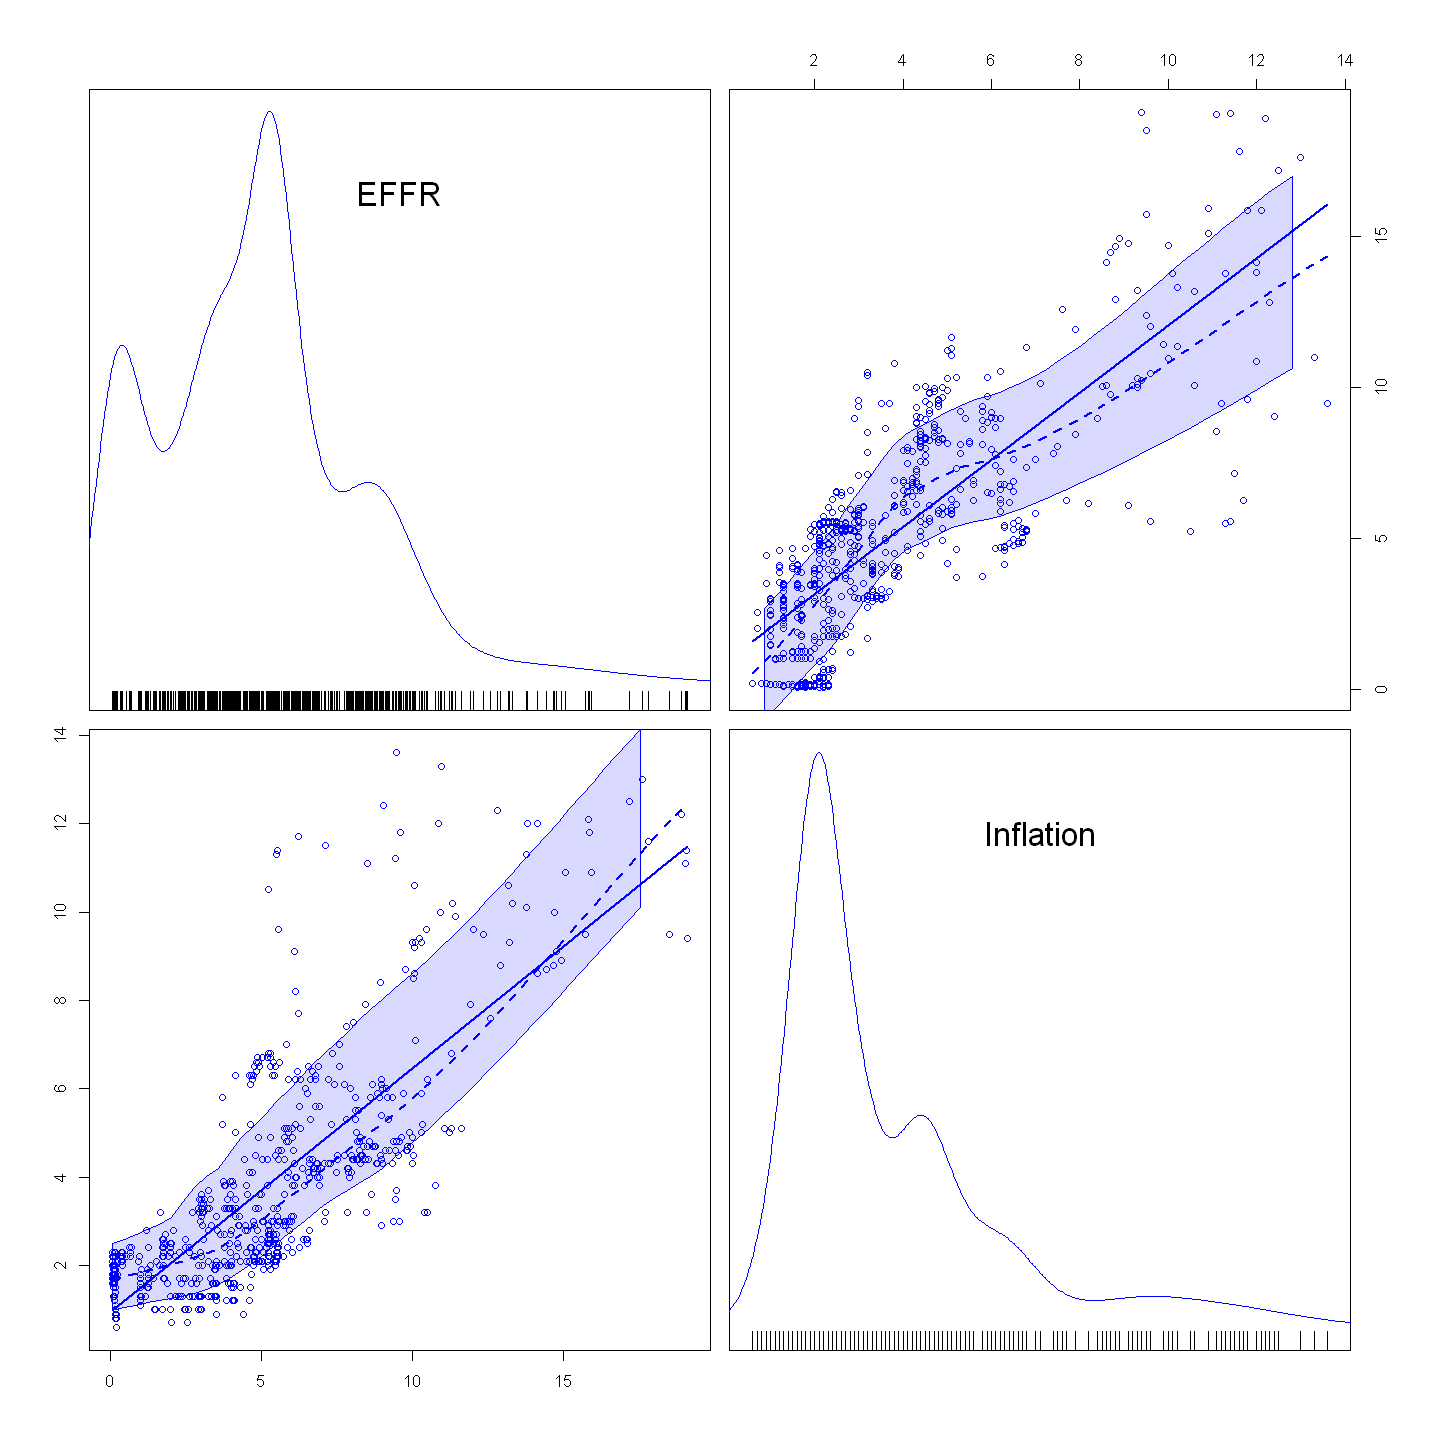

In [4]:
options(repr.plot.width=12, repr.plot.height=12)
scatterplotMatrix(UI, cex = 1.0)

## 4.2 Побудувати відповідну регресійну модель.

In [5]:
model <- lm(EFFR ~ poly(Inflation, degree = 3), data = UI)
summary(model)


Call:
lm(formula = EFFR ~ poly(Inflation, degree = 3), data = UI)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8049 -1.7734  0.1978  1.5375  8.3421 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.06424    0.08251  61.381   <2e-16 ***
poly(Inflation, degree = 3)1  76.33072    2.19842  34.721   <2e-16 ***
poly(Inflation, degree = 3)2 -14.19358    2.19842  -6.456    2e-10 ***
poly(Inflation, degree = 3)3   5.47909    2.19842   2.492   0.0129 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.198 on 706 degrees of freedom
Multiple R-squared:  0.6397,	Adjusted R-squared:  0.6382 
F-statistic: 417.8 on 3 and 706 DF,  p-value: < 2.2e-16


## 4.3 Зобразити отриману лінію регресії на одному графіку з діаграмою розсіювання.

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


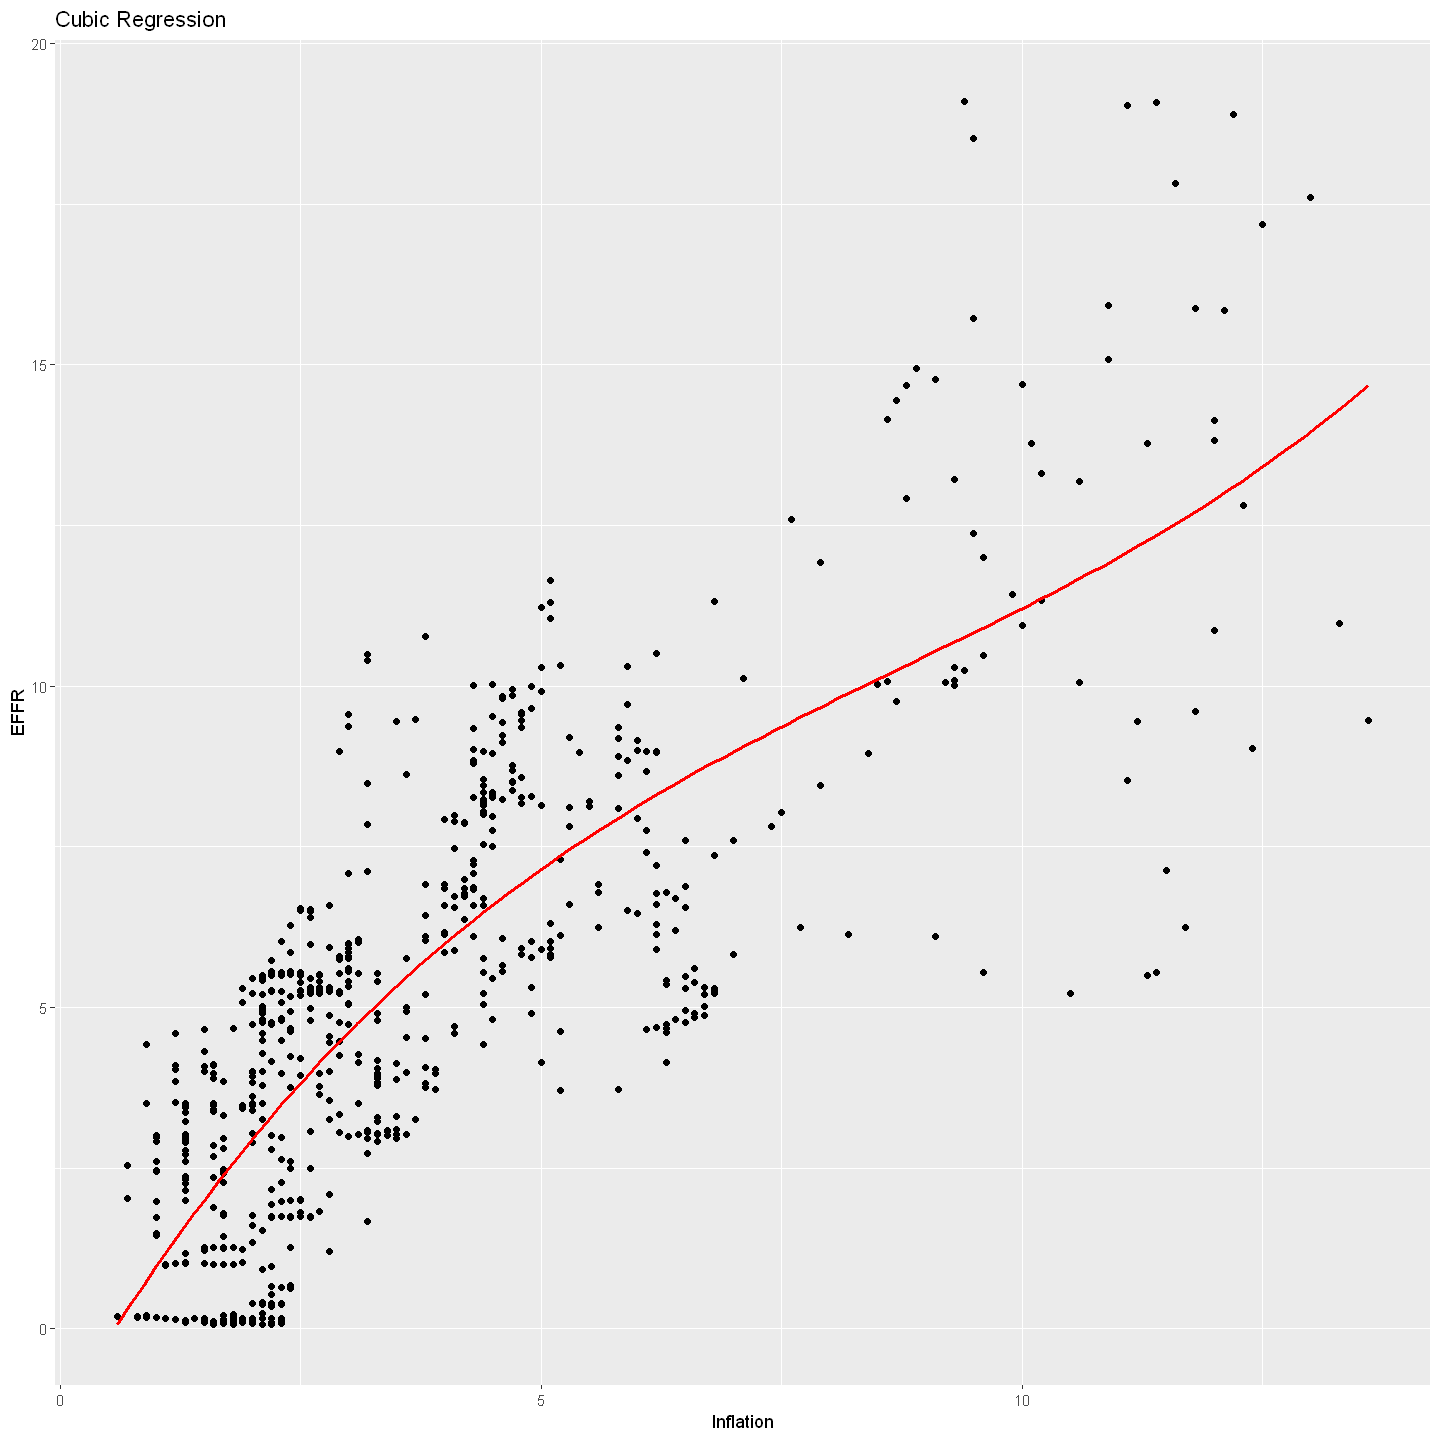

In [6]:
new_data <- data.frame(Inflation = seq(min(UI$Inflation), max(UI$Inflation), length.out = 100))

predictions <- predict(model, newdata = new_data)

# Create the plot
ggplot(UI, aes(x = Inflation, y = EFFR)) +
  geom_point() +
  geom_line(data = data.frame(Inflation = new_data$Inflation, EFFR = predictions), 
            aes(x = Inflation, y = EFFR), color = "red", size = 1) +
  labs(title = "Cubic Regression",
       x = "Inflation",
       y = "EFFR")


## 4.4 Побудувати діаграму «відгук-прогноз»

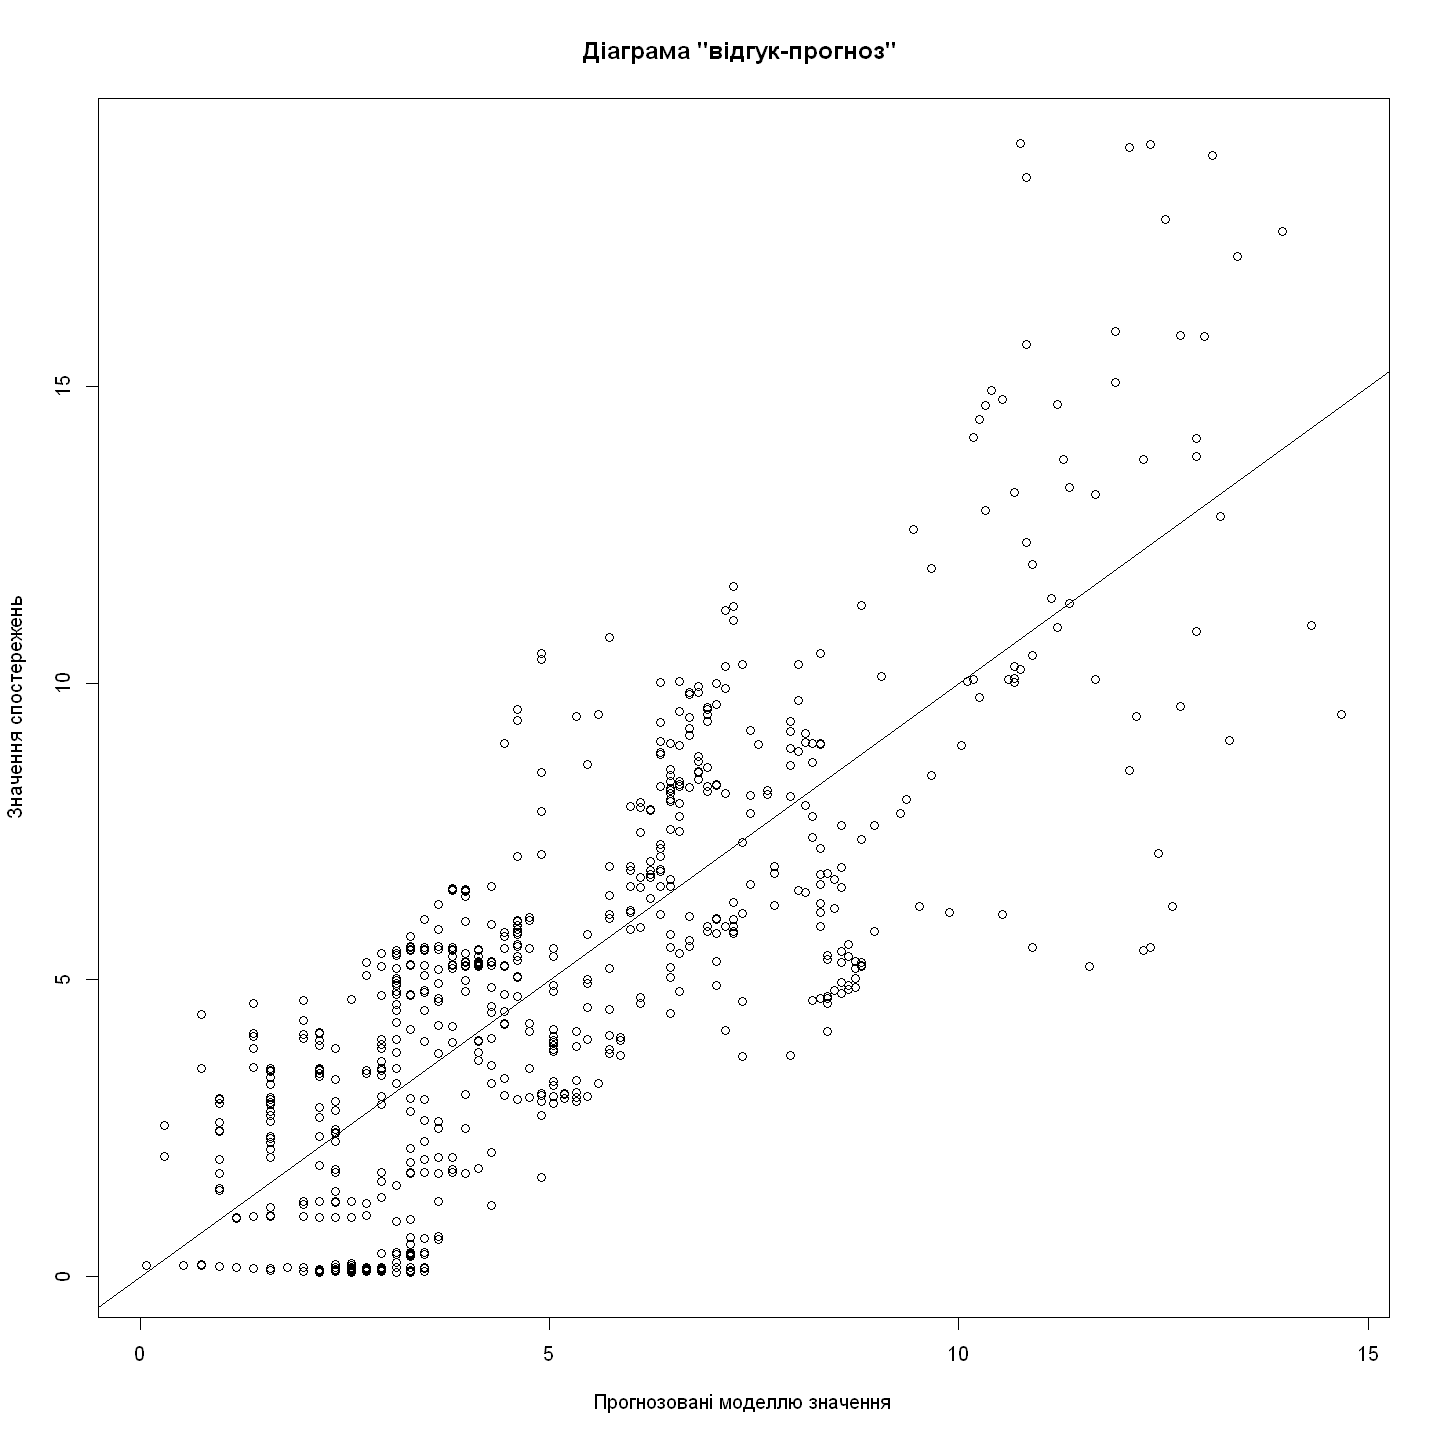

In [7]:
plot(UI$EFFR ~ fitted(model), xlab = "Прогнозовані моделлю значення", ylab = "Значення спостережень", main = "Діаграма \"відгук-прогноз\" ")
abline(0, 1)

## 4.5 Побудувати діаграму «відгук-залишки»

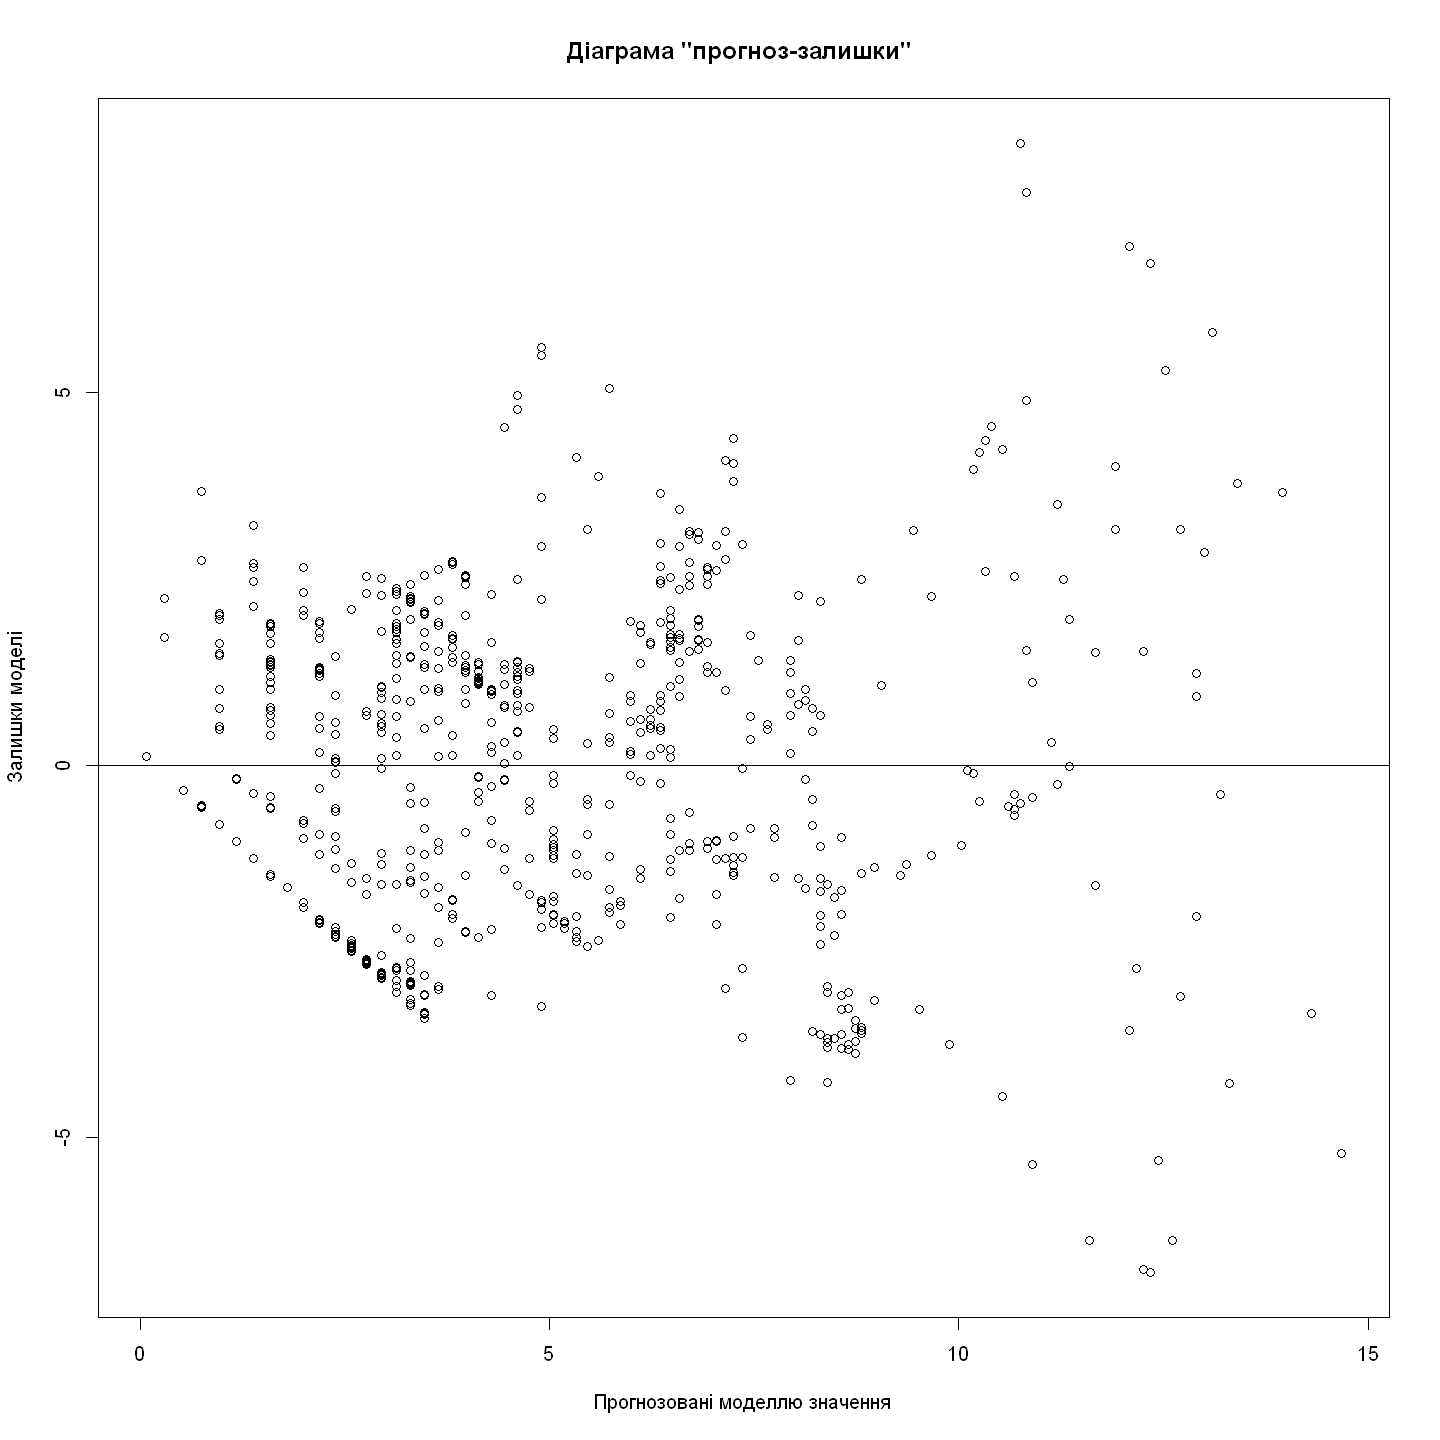

In [8]:
plot(resid(model) ~ fitted(model), xlab = "Прогнозовані моделлю значення", ylab = "Залишки моделі", main = "Діаграма \"прогноз-залишки\" ")
abline(h = 0)

## 4.6 Побудувати діаграму залишків за номером спостереження.

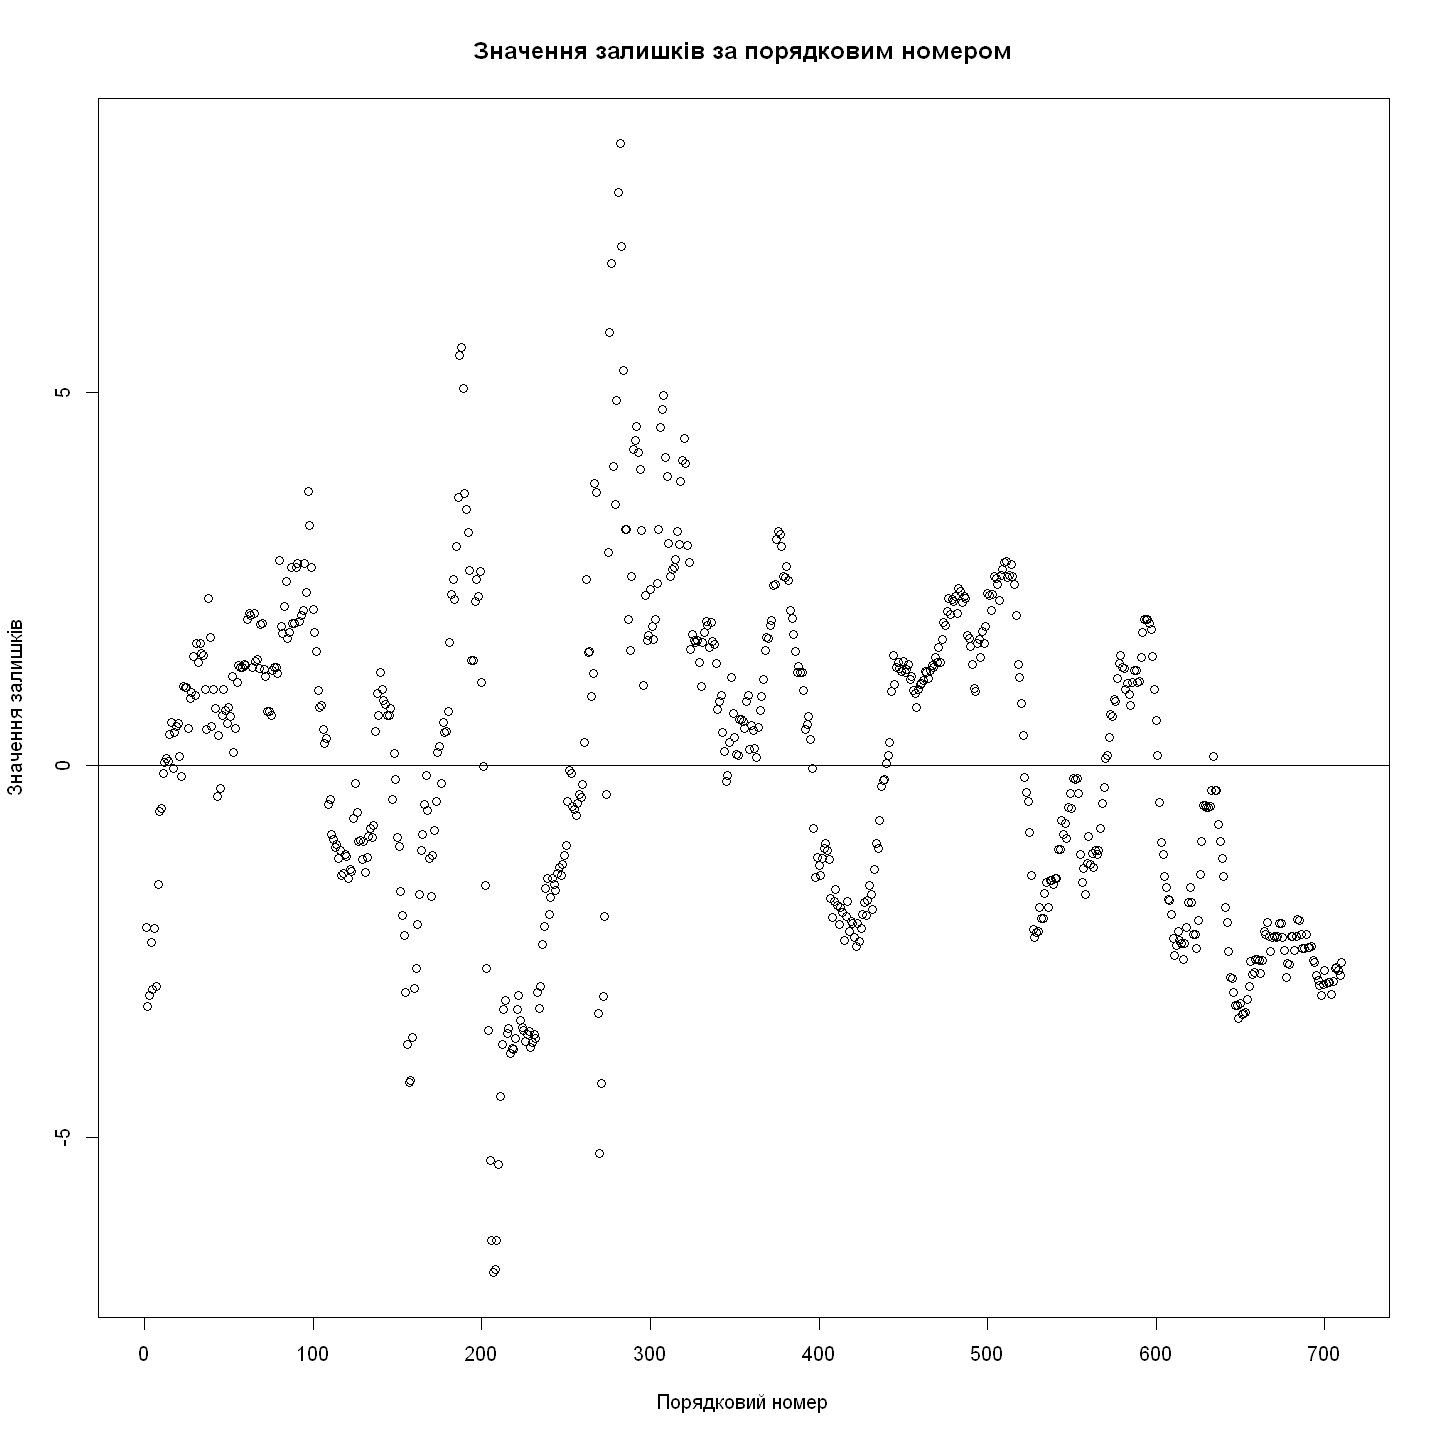

In [9]:
plot(c(1:length(UI$EFFR)), resid(model), xlab = "Порядковий номер", ylab = "Значення залишків", main = "Значення залишків за порядковим номером")
abline(h = 0)

## 4.7 Побудувати Q-Q-діаграму для залишків.

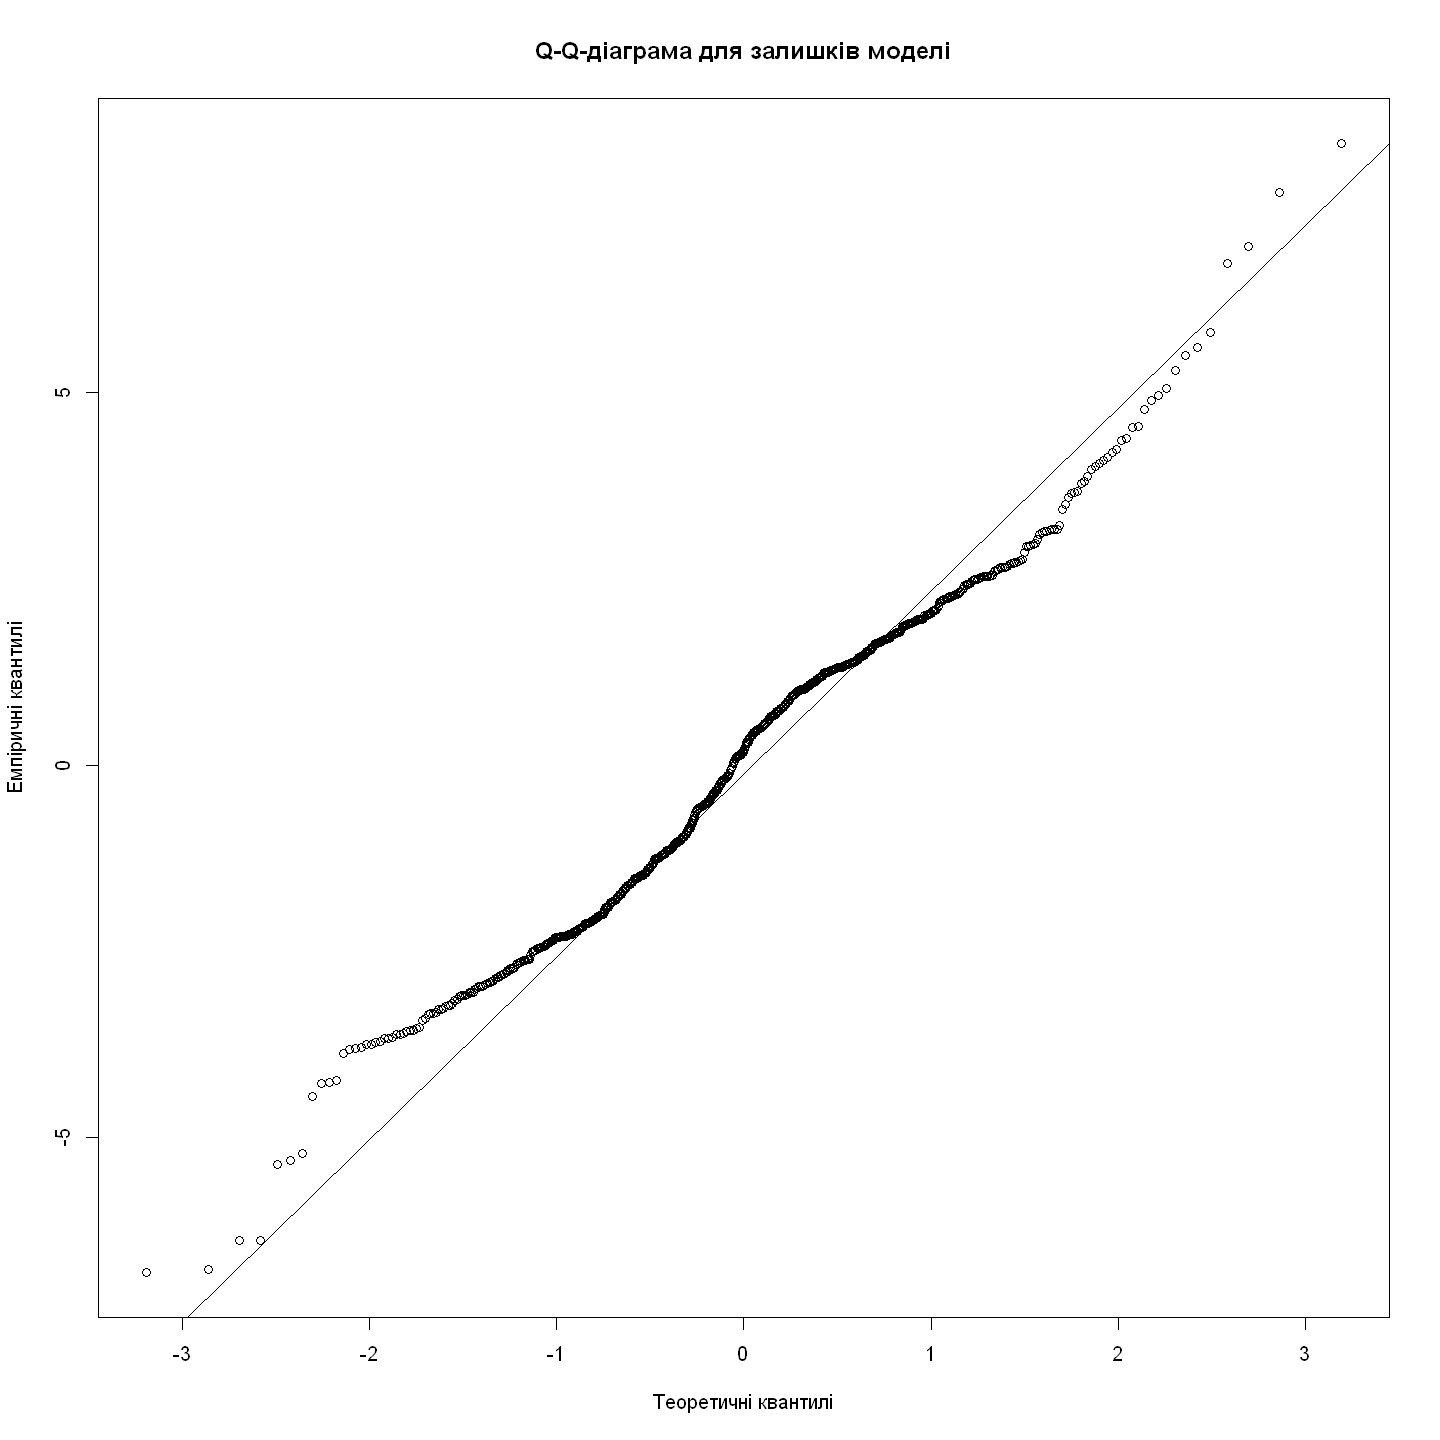

In [10]:
qqnorm(resid(model), main = "Q-Q-діаграма для залишків моделі", xlab = "Теоретичні квантилі", ylab = "Емпіричні квантилі")
qqline(resid(model))

In [11]:
shapiro.test(resid(model))


	Shapiro-Wilk normality test

data:  resid(model)
W = 0.98523, p-value = 1.386e-06


Перевiрка моделi на вiдсутнiсть гомоскедастичностi або гетероскедастичностi

In [12]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 153.05, df = 3, p-value < 2.2e-16
